In [1]:
#importing the required libraries and function in Python
import pandas as pd
import numpy as np 
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
#Generating data code 
#Data is in the dataframe called data 
#Columns are individual cases
#rows are the dimensions to be reduced, i.e. features, properties, measurements etc. for each case


genes = ['gene' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 

In [3]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 

In [5]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,178,172,176,164,141,365,388,362,373,373
gene2,524,491,510,475,471,138,157,131,127,139
gene3,350,367,333,364,331,553,521,522,494,539
gene4,314,262,255,269,285,180,192,159,160,166
gene5,617,647,619,598,632,492,531,529,501,490


In [6]:
data.shape

(100, 10)

In [7]:
#Perform PCA on the data
#Scale and Center the data 
scaled_data = preprocessing.scale(data.T)

In [8]:
#Create a PCA object from sklearn 
pca = PCA()
#fit the model to the data (may not be the best way of articulating what PCA does vs machine learning model)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)


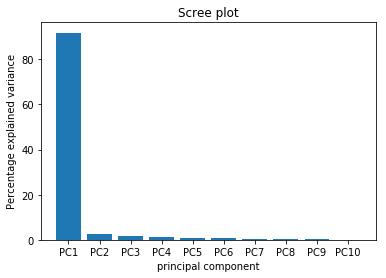

In [9]:
#Draw a scree plot (basically a pareto for principal components)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1) ]
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels )
plt.ylabel('Percentage explained variance')
plt.xlabel('principal component')
plt.title('Scree plot')
plt.show()

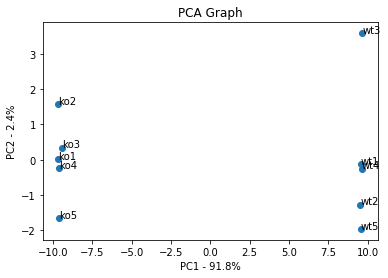

In [10]:
#plot using principle components 1 and 2
pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns = labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC1 - {}%'.format(per_var[0]))
plt.ylabel('PC2 - {}%'.format(per_var[1]))
plt.title('PCA Graph')

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

In [11]:
#Determine which 10 variables had the greatest influence on PC1
#Get loading scores, sort them in descending order then pick out the first 10
loading_scores = pd.Series(pca.components_[0], index= genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

#Get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

In [12]:
print(loading_scores[top_10_genes])

gene46    0.104361
gene51    0.104349
gene87   -0.104332
gene32   -0.104331
gene75   -0.104329
gene54    0.104324
gene11    0.104323
gene39   -0.104320
gene27    0.104316
gene90    0.104313
dtype: float64
